In [46]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
#генерируем случайные х и у
delta = 1.0
x = linspace(-10,10,20)
y = x**3+delta*(rand(20))
x += delta*(rand(20))
#записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)



[-9.88034392 -8.50648642 -7.62645652 -6.76802823 -5.36202639 -4.31992959
 -3.1855447  -2.21579075 -0.79882993  0.28873697  1.18392705  2.09178245
  3.18162038  3.97604061  5.22681347  5.79218518  7.0175445   8.65121986
  9.88418071 10.23009327]
[-9.99558279e+02 -7.15353518e+02 -4.91880503e+02 -3.19886306e+02
 -1.93461143e+02 -1.05430630e+02 -4.97865235e+01 -1.81100824e+01
 -2.99639666e+00  3.57295575e-02  7.29567505e-01  4.42786995e+00
  1.88413654e+01  5.09992252e+01  1.07214327e+02  1.94602850e+02
  3.21011467e+02  4.92300926e+02  7.17276446e+02  1.00046263e+03]


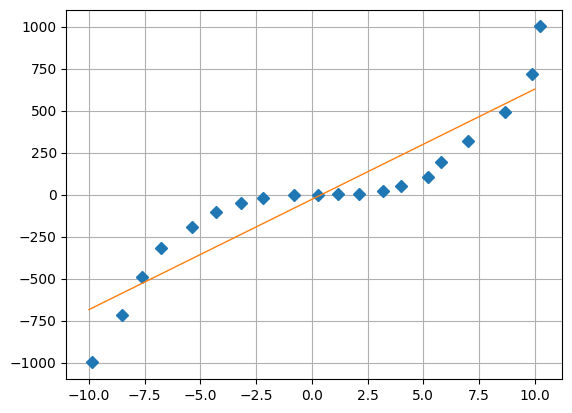

In [47]:
# Нахождение коэффициентов функции вида у = ах*2 + bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec+s[1],"-", lw=1)
plt.grid()

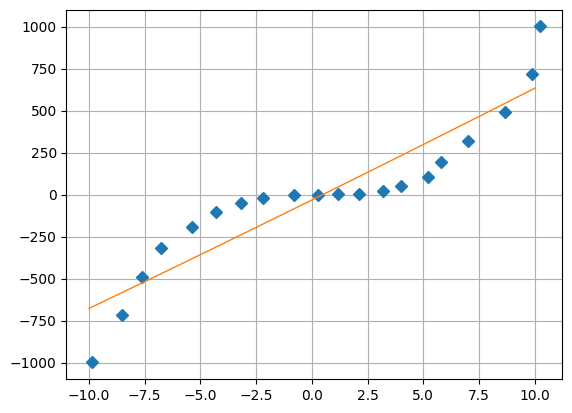

In [48]:
m = vstack((x**2, x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10,10, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],"-", lw=1)
plt.grid()


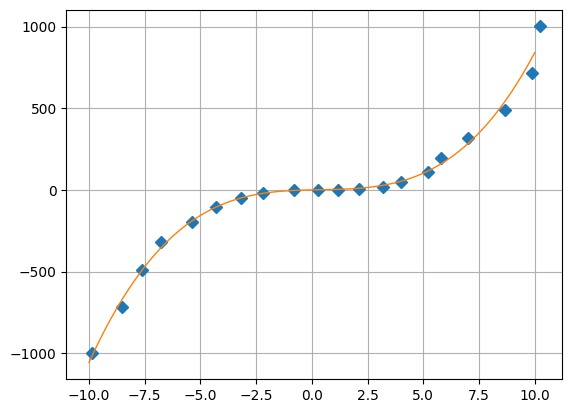

In [49]:
m = vstack((x**3,x**2, x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2+x_prec*s[2]+s[3],"-", lw=1)
plt.grid()


In [78]:
from scipy.optimize import curve_fit 
import scipy

In [92]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75) 
def f(x, be, b1):
    return be + b1*x
# зададим массив точек xі 
xdata=np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уі (без шума)
y=f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.2498423  0.74966016]
0.0002921159313498357
0.15500719284534478


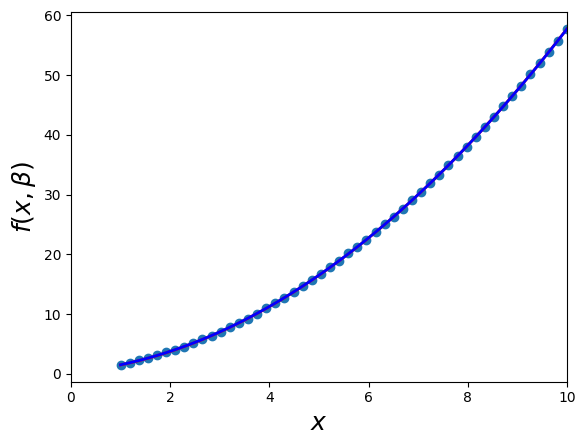

In [95]:
fig, ax = plt.subplots()
ax. scatter(xdata, ydata) 
ax. plot(xdata, y, 'r', lw=2) 
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[0.28663944 0.73980589 0.50064889]
0.0004786101146242689


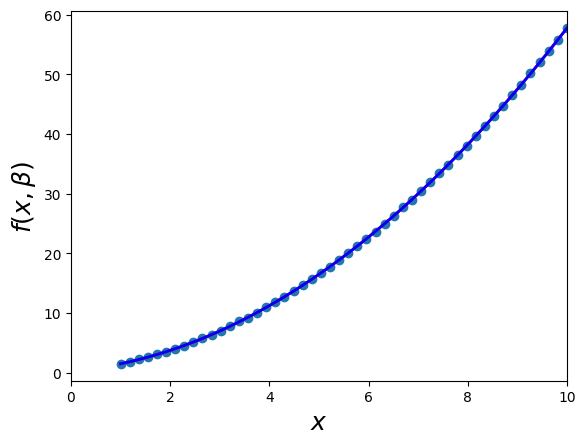

In [96]:
#решение #2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b - (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5) 
def f(x, be, b1, b2): 
    return be + b1 * x + b2 * x * x
# зададим массив точек xі
xdata = np.linspace(1, 10, 50) # создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, *beta_opt) fres - sum(residuals**2) print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt. show()

[1.01819392 1.98511426]
0.0001627048171819832


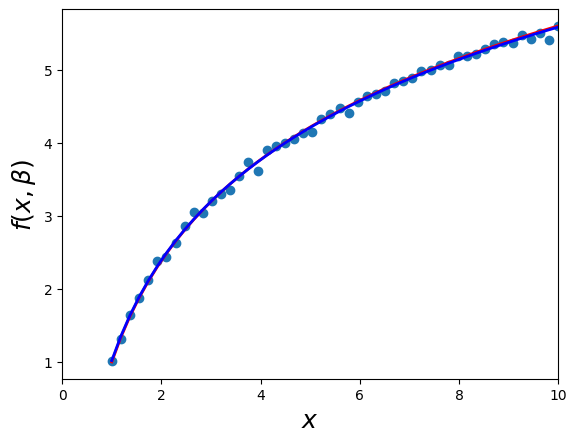

In [97]:
#решение #3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xі 
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt) #Вычислим линейное отклонение
lin_dev = sum(beta_cov[0]) 
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, *beta_opt) fres = sum(residuals**2) print(fres)
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

In [98]:
#решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, be, b1):
    return be * x ** b1
# зададим массив точек xі
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.99947    2.00036237]
1.4366478521398624e-06
0.13168338465891363


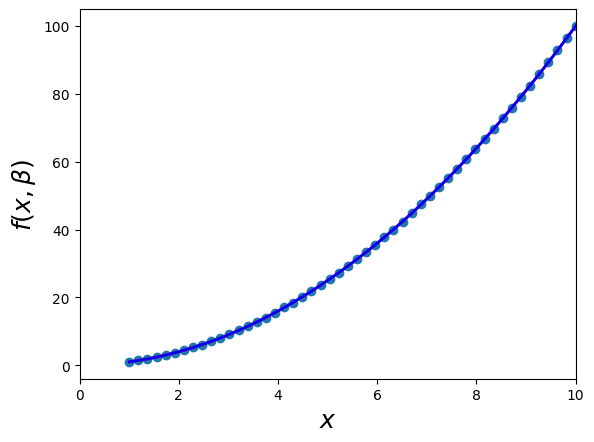

In [99]:
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()